# General Match Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\amanr\\OneDrive\\Desktop\\Scalar\\MY_EDA_Project'

In [4]:
match_df = pd.read_csv("Data\\IPL Matches 2008-2020.csv")
dlv_df = pd.read_csv("Data\\IPL Ball-by-Ball 2008-2020.csv")

In [6]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [11]:
dlv_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [12]:
dlv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

### Most wins 

In [18]:
df_wins = pd.DataFrame(match_df['winner'].value_counts())
df_wins

,winner
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Royal Challengers Bangalore,91
Kings XI Punjab,88
Rajasthan Royals,81
Delhi Daredevils,67
Sunrisers Hyderabad,66
Deccan Chargers,29
Delhi Capitals,19


In [24]:
df_wins['winner']

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

[]

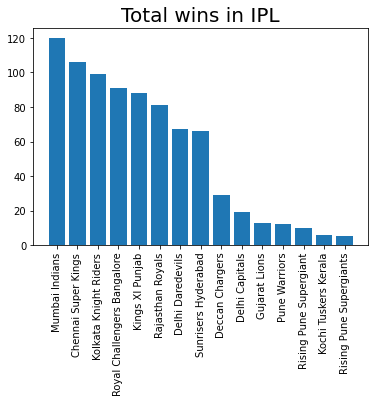

In [83]:
plt.bar(df_wins.index,df_wins['winner'])
plt.xticks(rotation = 90)
plt.title("Total wins in IPL", size = 20)
plt.plot()

<AxesSubplot:>

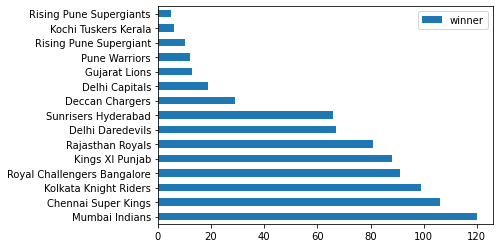

In [33]:
# can also plot using this command
df_wins.plot(kind = 'barh')

### Top 10 Batsman

In [85]:
batsman = dlv_df.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs']))
batsman

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2750
Z Khan             117
Length: 537, dtype: int64

In [86]:
batsman = batsman.reset_index(name="runs")
Top_batsman = batsman.sort_values('runs', ascending =False)[:10]

In [87]:
Top_batsman

,batsman,runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 Batsman in IPL')

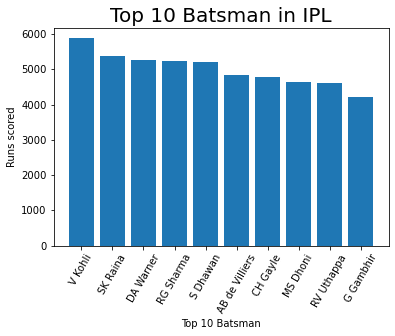

In [90]:
plt.bar(Top_batsman['batsman'], Top_batsman['runs'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsman',size=10)
plt.ylabel('Runs scored',size=10)
plt.title('Top 10 Batsman in IPL',size=20)

### Top 10 bowlers

In [79]:
bowler = dlv_df.groupby('bowler').apply(lambda x:np.sum(x['is_wicket'])).reset_index(name="wicket")

Top_bowler = bowler.sort_values('wicket', ascending =False)[:10]

Top_bowler

,bowler,wicket
350,SL Malinga,188
99,DJ Bravo,175
6,A Mishra,169
276,PP Chawla,164
133,Harbhajan Singh,161
281,R Ashwin,153
57,B Kumar,146
358,SP Narine,143
396,UT Yadav,137
292,R Vinay Kumar,127


Text(0.5, 1.0, 'Top 10 Bowler in IPL')

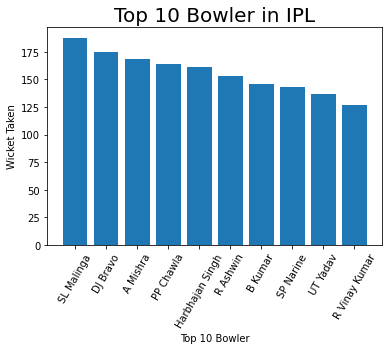

In [81]:
plt.bar(Top_bowler['bowler'], Top_bowler['wicket'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowler',size=10)
plt.ylabel('Wicket Taken',size=10)
plt.title('Top 10 Bowler in IPL',size=20)